# The Visitor Pattern

### Problem

Imagine that your team develops an app's module - an online shopping cart. 
 
You have different items like books, electronics, and clothing, etc.

So, you have many existing classes. And, in this case we have a group of related classes.

Each item can be a pretty complex entity. 

Under the hood, each item type is represented by its own class, while each specific item is an object.

At some point, you got a task to implement applying discounts feature.

So, you need to add new operations to a stable set of preexisting classes.

At first, the job seemed pretty straightforward. 

You planned to add an *applyDiscount* method to each item class and then use a recursion to go over each item of the shopping cart, executing the *applyDiscount* method. 

But the system architect refused to allow you to do that. Because the code was already in production and he didn’t want to risk breaking it because of a potential bug in your changes.

Moreover, he informed you that it is not the only and the last new feature you would be required to add.

Additionally, embedding logging behavior within classes primarily designed for core functionalities raises questions about the coherence of such an approach

So, you have to resolve how to perform various operations on a stable set of classes.
The solution must make this easy to extend functionality without crusial altering the existing codebase.

### Solution

The **Visitor** pattern is used `to separate algorithms from the objects on which they operate`. 

This allows for adding new operations to existing object structures without modifying those structures.

It suggests that you place the `new behavior into a separate clas`s called **`visitor`**.

The original object that had to perform the behavior is now passed to one of the visitor’s methods as an argument, providing the method access to all necessary data contained within the object

**Real-World Analogy**

Imagine an insurance company assessing various types of policies (e.g., car, home, health). Inspectors (visitors) evaluate these policies based on specific criteria:

* Safety Inspector: Checks safety measures in homes and cars.
* Health Inspector: Evaluates the health condition of policyholders.
* Financial Inspector: Assesses financial risks associated with the policyholder.

Each type of policy (element) would implement an accept method that allows different inspectors to assess the policy without altering the policy’s structure.

**Key Components**:
* Visitor Interface: Declares visiting methods for concrete elements, allowing methods with the same names in languages supporting overloading, but requiring different parameter types.
* Concrete Visitor: Implements behavior variations for different element classes, enabling tailored actions during visits.
* Element Interface: The Element interface includes an accept method with one parameter specifying the type of the visitor interface for visitor acceptance.
* Concrete Element: Implements the accept method to redirect calls to the appropriate visitor methods, ensuring specific handling for each element.
* Client: Represents a collection, interacting with elements through an abstract interface and orchestrating visitor acceptance without detailed knowledge of concrete classes.


### UML Class Diagram

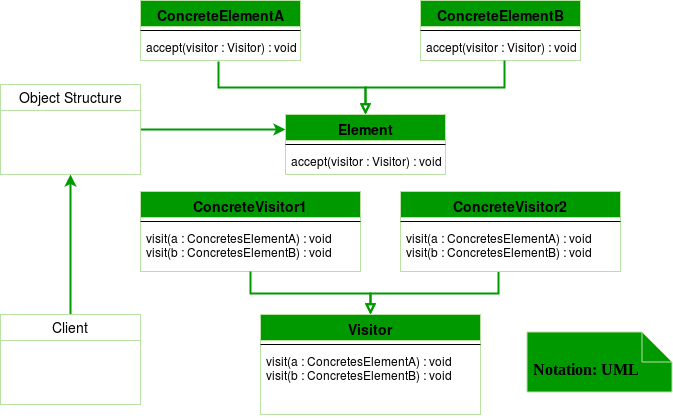

### When to Use

* When an object structure contains many classes of objects with differing interfaces, and you want to perform operations on these objects that depend on their concrete classes.
* When you need to execute many unrelated operations across the classes without coupling these operations to the classes.
* When the object structure is relatively stable, but you expect to add new operations frequently.

### Example 1 - an abstract implementation 

In [1]:
from abc import ABC, abstractmethod

# Step 1: Visitor Interface
class Visitor(ABC):
    @abstractmethod
    def visit_concrete_element_a(self, element_a):
        pass

    @abstractmethod
    def visit_concrete_element_b(self, element_b):
        pass

In [7]:
# Concrete Visitor A
class ConcreteVisitorA(Visitor):
    def visit_concrete_element_a(self, element_a):
        print(f"Visitor A visiting {element_a} by performing A_A")

    def visit_concrete_element_b(self, element_b):
        print(f"Visitor A visiting {element_b} by performing A_B")


# Concrete Visitor B
class ConcreteVisitorB(Visitor):
    def visit_concrete_element_a(self, element_a):
        print(f"Visitor B visiting {element_a} by performing B_A")

    def visit_concrete_element_b(self, element_b):
        print(f"Visitor B visiting {element_b} by performing B_B")

In [9]:
# Step 3: Element Interface
class Element(ABC):
    @abstractmethod
    def accept(self, visitor):
        pass

In [10]:
# Step 4: Concrete Elements
class ConcreteElementA(Element):
    def accept(self, visitor):
        visitor.visit_concrete_element_a(self)

    def operation_a(self):
        return "Operation A"


class ConcreteElementB(Element):
    def accept(self, visitor):
        visitor.visit_concrete_element_b(self)

    def operation_b(self):
        return "Operation B"

In [11]:
# Client Code
# Creating concrete elements
element_a = ConcreteElementA()
element_b = ConcreteElementB()

# Creating concrete visitors
visitor_a = ConcreteVisitorA()
visitor_b = ConcreteVisitorB()

# Accepting visitors
element_a.accept(visitor_a)
element_b.accept(visitor_a)

element_a.accept(visitor_b)
element_b.accept(visitor_b)

Visitor A visiting <__main__.ConcreteElementA object at 0x0000021DD393FB60> by performing A_A
Visitor A visiting <__main__.ConcreteElementB object at 0x0000021DD393F8C0> by performing A_B
Visitor B visiting <__main__.ConcreteElementA object at 0x0000021DD393FB60> by performing B_A
Visitor B visiting <__main__.ConcreteElementB object at 0x0000021DD393F8C0> by performing B_B


https://medium.com/@amirm.lavasani/design-patterns-in-python-visitor-f20085b35d8b

https://medium.com/@chilukavinayak.p/visitor-design-pattern-919946fb1d40